# Visualización con Seaborn

Matplotlib ha demostrado ser una herramienta de visualización increíblemente útil y popular, pero incluso los usuarios entusiastas admitirán que a menudo deja mucho que desear. Hay varias quejas válidas sobre Matplotlib que a menudo surgen.

Una respuesta a estos problemas es [Seaborn] (http://seaborn.pydata.org/). Seaborn proporciona una API sobre Matplotlib que ofrece opciones sensatas para el estilo de trazado y los valores predeterminados de color, define funciones simples de alto nivel para tipos de trazado estadísticos comunes, y se integra con la funcionalidad proporcionada por Pandas `` DataFrame``.

## Seaborn Versus Matplotlib

Aquí hay un ejemplo de una trama de ramdom-walk simple en Matplotlib, usando su formato y colores de trama clásicos.Comenzamos con las importaciones típicas:

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

Creamos algunos datos aleatorios (random walk):

In [2]:
# Create algunos datos
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

y trazar un simple gráfico:

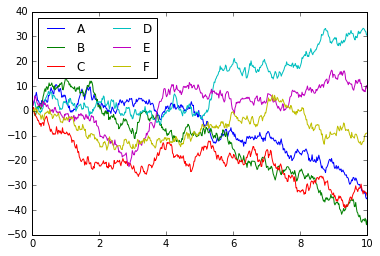

In [3]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Aunque el resultado contiene toda la información que nos gustaría transmitir, lo hace de una manera que no es tan estéticamente agradable e incluso parece un poco anticuada en el contexto de la visualización de datos del siglo XXI.

Ahora echemos un vistazo a cómo funciona con Seaborn.Como veremos, Seaborn tiene muchas de sus propias rutinas de trazado de alto nivel, pero también puede sobrescribir los parámetros predeterminados de Matplotlib y, a su vez, obtener incluso scripts de Matplotlib simples para producir una salida muy superior.

Podemos establecer el estilo llamando al método ``set ()`` de Seaborn.Por convención, Seaborn se importa como ``sns``:

In [4]:
import seaborn as sns
sns.set()

Ahora volvamos a ejecutar las mismas dos líneas que antes:

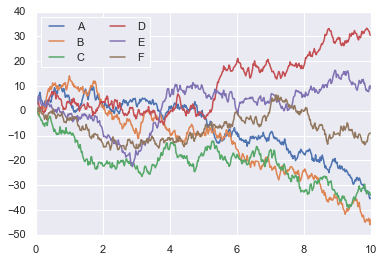

In [5]:
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Mucho mejor!

## Explorando Seaborn Plots

La idea principal de Seaborn es que proporciona comandos de alto nivel para crear una variedad de tipos de gráficos útiles para la exploración de datos estadísticos, e incluso algunos ajustes de modelos estadísticos.

Echemos un vistazo a algunos de los conjuntos de datos y tipos de gráficos disponibles en Seaborn. Tenga en cuenta que todo lo siguiente *podría* hacerse con los comandos sin procesar de Matplotlib (esto es, de hecho, lo que hace Seaborn), pero la API Seaborn es mucho más conveniente.

### Histogramas, KDE, and densidades

A menudo, en la visualización de datos estadísticos, todo lo que desea es trazar histogramas y distribuciones conjuntas de variables.
Hemos visto que esto es relativamente sencillo en Matplotlib:

AttributeError: 'Rectangle' object has no property 'normed'

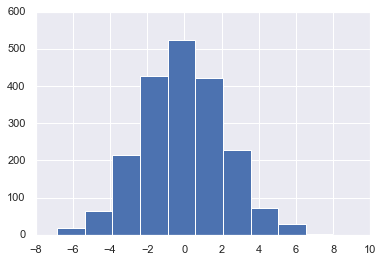

In [6]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)

En lugar de un histograma, podemos obtener una estimación uniforme de la distribución utilizando una estimación de densidad por kernel, que Seaborn hace con ``sns.kdeplot``:

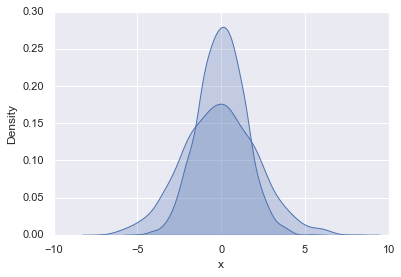

In [7]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

Histogramas y kernel density estimation (KDE) pueden ser combinados usando ``distplot``:

/Users/mfidabel/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mfidabel/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


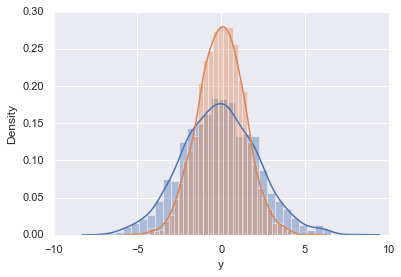

In [8]:
sns.distplot(data['x'])
sns.distplot(data['y']);

Si pasamos el conjunto de datos bidimensional completo a `` kdeplot``, obtendremos una visualización bidimensional de los datos:

In [ ]:
sns.kdeplot(data);

Podemos ver la distribución conjunta y las distribuciones marginales juntas usando ``sns.jointplot``.
Para esta trama, estableceremos el estilo en un fondo blanco:

/Users/mfidabel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


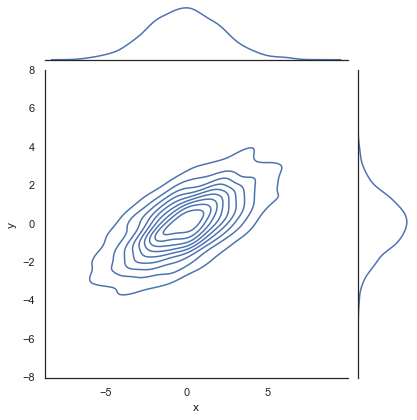

In [10]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

Hay otros parámetros que se pueden pasar a ``plot``; por ejemplo, podemos usar un histograma basado en hexagonal en su lugar:

/Users/mfidabel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


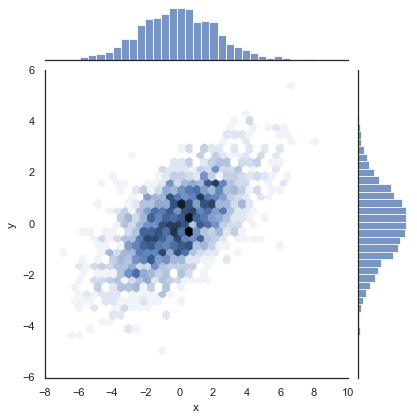

In [11]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

### Pair plots

Cuando generaliza gráficos de conjuntos a conjuntos de datos de dimensiones más grandes, termina con *gráficos de pares*. Esto es muy útil para explorar correlaciones entre datos multidimensionales, cuando desea graficar todos los pares de valores entre sí.

Demostraremos esto con el conocido conjunto de datos Iris, que enumera las medidas de pétalos y sépalos de tres especies de iris:

In [12]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Visualizar las relaciones multidimensionales entre las muestras es tan fácil como llamar ``sns.pairplot``:

/Users/mfidabel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


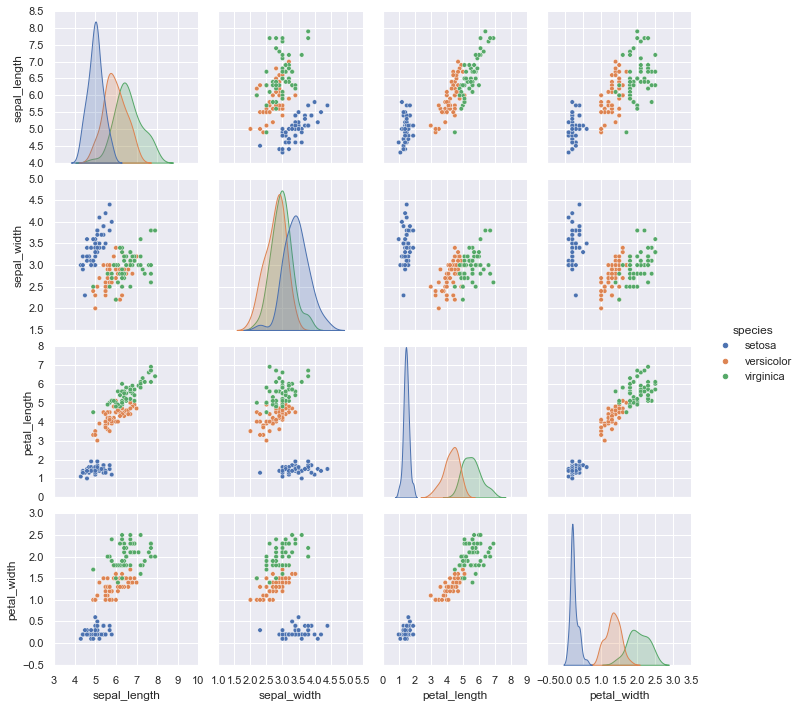

In [13]:
sns.pairplot(iris, hue='species', size=2.5);

### Facetas - histogramas

A veces, la mejor manera de ver datos es a través de histogramas de subconjuntos. ``FacetGrid`` de Seaborn lo hace extremadamente simple.
Veamos algunos datos que muestran la cantidad que recibe el personal del restaurante en tips basados en diversos indicadores de datos:

In [14]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


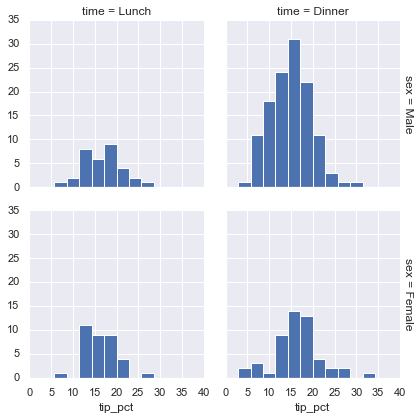

In [15]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### Factor plots

Los gráficos de factores también pueden ser útiles para este tipo de visualización. Esto le permite ver la distribución de un parámetro dentro de los contenedores definidos por cualquier otro parámetro:

/Users/mfidabel/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/mfidabel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


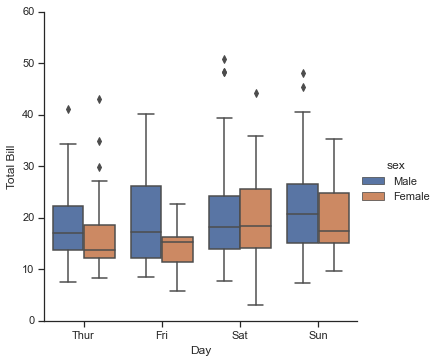

In [16]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

### Joint distributions

Similar al diagrama de pares que vimos anteriormente, podemos usar ``sns.jointplot`` para mostrar la distribución conjunta entre diferentes conjuntos de datos, junto con las distribuciones marginales asociadas:

/Users/mfidabel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


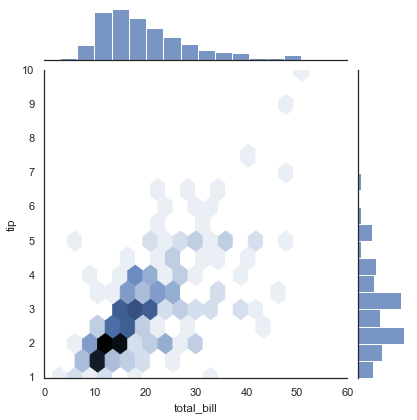

In [17]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

La gráfica conjunta puede incluso hacer una estimación automática de la densidad por kernel y de la regresión lineal:

/Users/mfidabel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


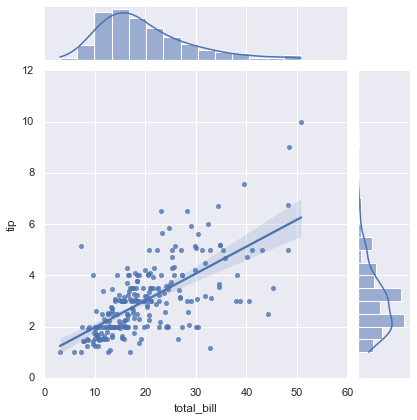

In [18]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg');

### Bar plots

Series temporales pueden ser trazadas usando ``sns.factorplot``. 

In [19]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


/Users/mfidabel/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/mfidabel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


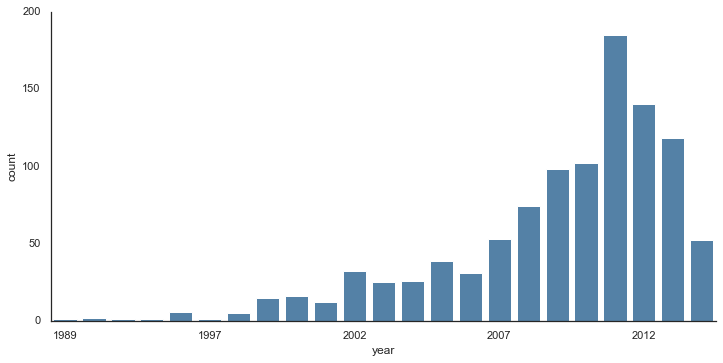

In [20]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

Podemos aprender más mirando el *método* de descubrimiento de cada uno de estos planetas:

/Users/mfidabel/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/mfidabel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


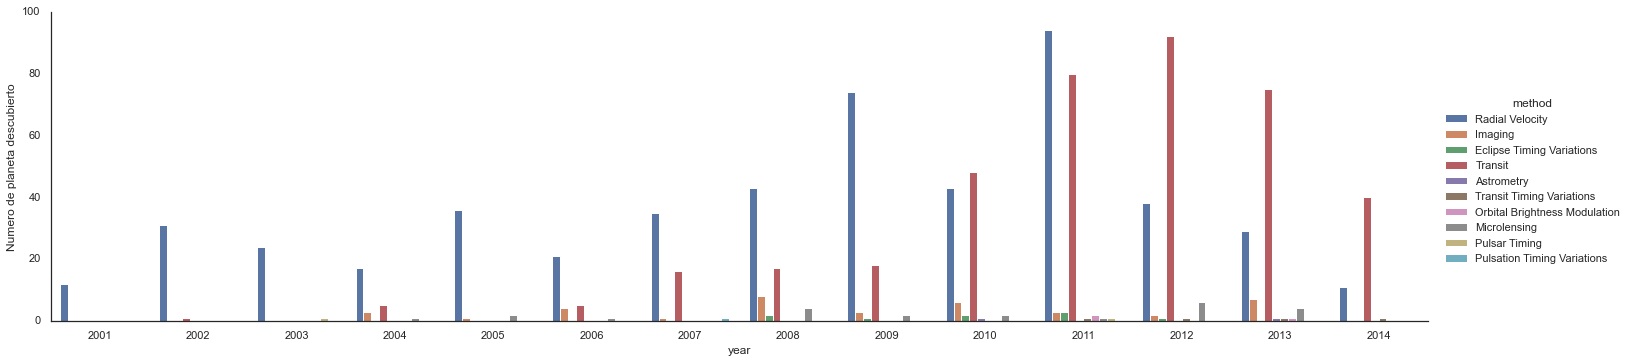

In [21]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Numero de planeta descubierto')

Para información sobre como realizar trazados con Seaborn, ver  [Seaborn documentation](http://seaborn.pydata.org/), un [tutorial](http://seaborn.pydata.org/tutorial.html), y la [Seaborn gallery](http://seaborn.pydata.org/examples/index.html).

## Ejemplo: Explorando Marathon Finishing Times

Aquí veremos cómo usar Seaborn para ayudar a visualizar y comprender los resultados finales de un maratón.
Los datos fueron colectados de fuentes en la Web.
Comenzaremos descargando los datos de
la Web, y cargándola en Pandas:

In [22]:
import pandas as pd
data = pd.read_csv('data/marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


Por defecto, Pandas cargó las columnas de tiempo como cadenas de Python (``objeto``); podemos ver esto mirando el atributo ``dtypes`` del DataFrame:

In [23]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

Arreglemos esto proporcionando un convertidor para los tiempos:

In [24]:
import datetime

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('data/marathon-data.csv',
                   converters={'split':convert_time, 'final':convert_time})
data.head()


,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [25]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

Para el propósito de nuestras utilidades de trazado Seaborn, a continuación agreguemos columnas que den los tiempos en segundos:

In [26]:
#data['split_sec'] = data['split'].astype(int) / 1E9
#data['final_sec'] = data['final'].astype(int) / 1E9
data['split_sec'] = data['split'] / np.timedelta64(1, 's')
data['final_sec'] = data['final'] / np.timedelta64(1, 's')
data.head()


,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


Para tener una idea de cómo se ven los datos, podemos trazar una ``gráfica conjunta`` sobre los datos:

/Users/mfidabel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


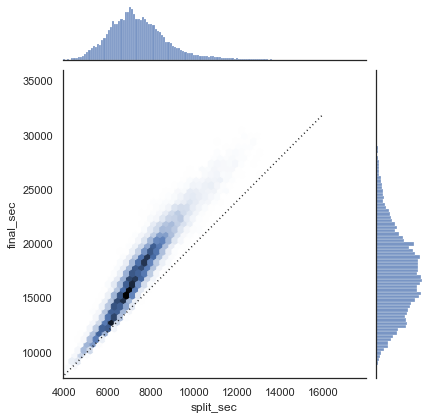

In [27]:
with sns.axes_style('white'):
    g = sns.jointplot("split_sec", "final_sec", data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

La línea punteada muestra dónde estaría el tiempo de alguien si corrieran el maratón a un ritmo perfectamente estable. El hecho de que la distribución se encuentre por encima de esto indica (como es de esperar) que la mayoría de las personas disminuyen la velocidad durante el maratón.
Si ha corrido de manera competitiva, sabrá que aquellos que hacen lo contrario, correr más rápido durante la segunda mitad de la carrera, se dice que han "dividido negativamente" la carrera.

Creemos otra columna en los datos, la fracción dividida, que mide el grado en que cada corredor divide negativamente o divide positivamente la carrera:

In [28]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842


Cuando esta diferencia dividida es menor que cero, la persona divide negativamente la carrera por esa fracción.

Hagamos un diagrama de distribución de esta fracción dividida:

/Users/mfidabel/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


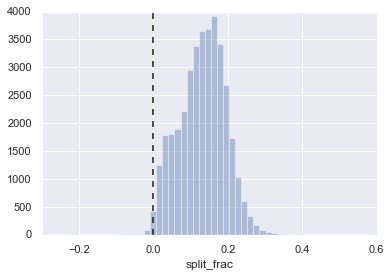

In [29]:
sns.distplot(data['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--");

In [30]:
sum(data.split_frac < 0)

251

De casi 40,000 participantes, solo había 250 personas que dividieron negativamente su maratón.

Veamos si hay alguna correlación entre esta fracción dividida y otras variables. Haremos esto usando una ``cuadrícula de pares``, que dibuja gráficos de todas estas correlaciones:

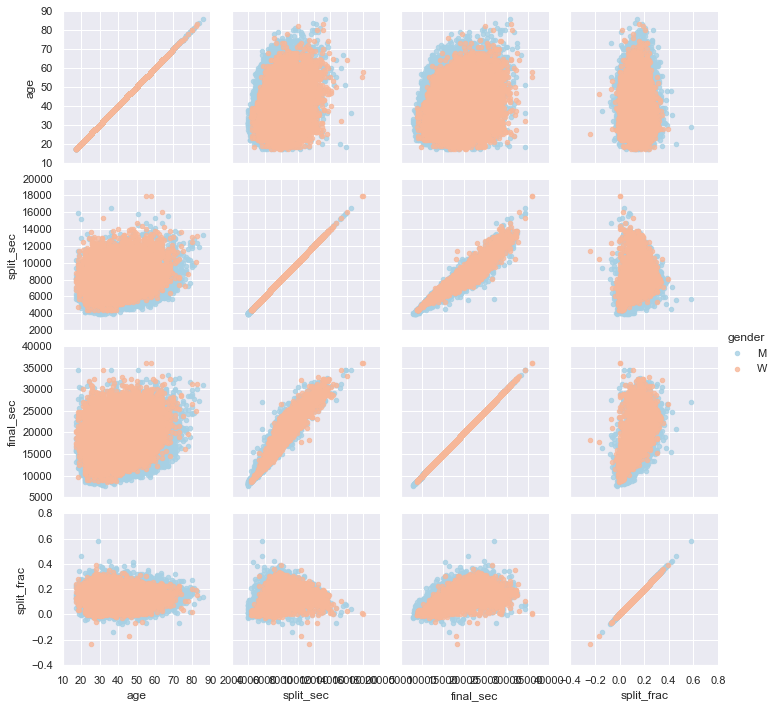

In [31]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

Parece que la fracción dividida no se correlaciona particularmente con la edad, pero sí se correlaciona con el tiempo final: los corredores más rápidos tienden a tener incluso más divisiones en su tiempo de maratón.

La diferencia entre hombres y mujeres aquí es interesante. Veamos el histograma de fracciones divididas para estos dos grupos:

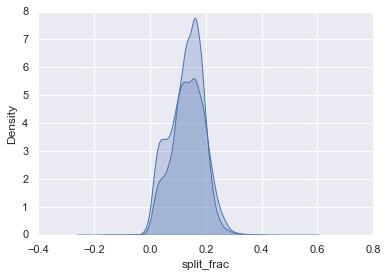

In [32]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True)
plt.xlabel('split_frac');

¡Lo interesante aquí es que hay muchos más hombres que mujeres que corren cerca de una división pareja!
Esto casi parece una especie de distribución bimodal entre hombres y mujeres. Veamos si podemos descubrir lo que está sucediendo mirando las distribuciones en función de la edad.

Una buena manera de comparar distribuciones es usar un *violin plot*

/Users/mfidabel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


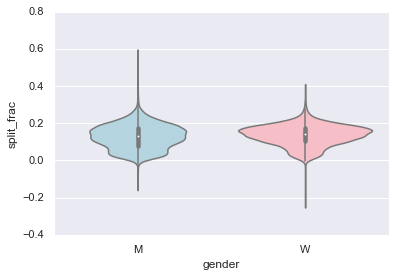

In [33]:
sns.violinplot("gender", "split_frac", data=data,
               palette=["lightblue", "lightpink"]);

Esta es otra forma de comparar las distribuciones entre hombres y mujeres.

Veamos un poco más profundo y comparemos estas parcelas de violín en función de la edad. Comenzaremos creando una nueva columna en la matriz que especifica la década de edad en que se encuentra cada persona:

In [34]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842,30


/Users/mfidabel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


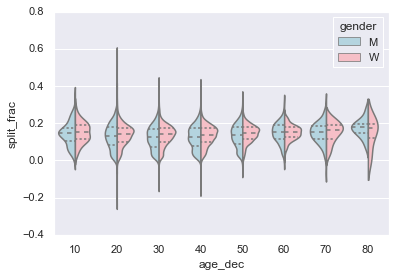

In [35]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot("age_dec", "split_frac", hue="gender", data=data,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

Mirando esto, podemos ver en qué difieren las distribuciones de hombres y mujeres: las distribuciones divididas de hombres de 20 a 50 años muestran una pronunciada sobredensidad hacia divisiones más bajas en comparación con mujeres de la misma edad (o de cualquier edad, por ejemplo). ese asunto).

También sorprendentemente, las mujeres de 80 años parecen superar a *todos* en términos de su tiempo parcial. Esto probablemente se deba al hecho de que estamos estimando la distribución a partir de números pequeños, ya que solo hay un puñado de corredores en ese rango:

In [36]:
(data.age > 80).sum()

7

Volviendo a los hombres con divisiones negativas: ¿quiénes son estos corredores? ¿Esta fracción dividida se correlaciona con terminar rápidamente? Podemos trazar esto muy fácilmente. Utilizaremos ``regplot``, que ajustará automáticamente una regresión lineal a los datos:

/Users/mfidabel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


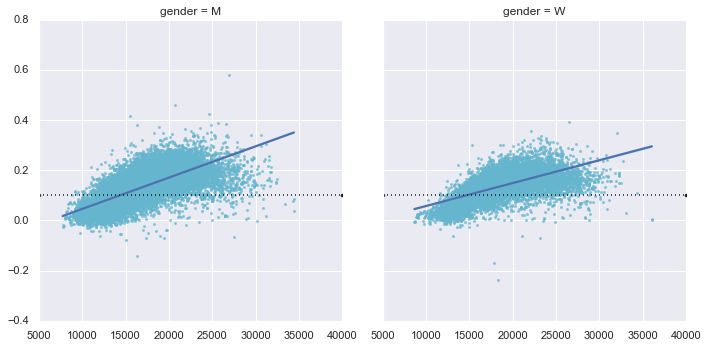

In [37]:
g = sns.lmplot('final_sec', 'split_frac', col='gender', data=data,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");

Aparentemente, las personas con divisiones rápidas son los corredores de élite que terminan en ~ 15,000 segundos, o alrededor de 4 horas. Las personas más lentas que eso tienen muchas menos probabilidades de tener una segunda división rápida.